<a href="https://colab.research.google.com/github/eswarijayakumar/100DaysOfMLCode/blob/master/Source_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**:
Run prediction using pre-trained model and dataset from HuggingFace.



*   Author: Eswari Jayakumar
*   Student ID: 3740758
*   Email: eswari.jayakumar@unb.ca



Dataset Chosen: Cats vs Dogs [ https://huggingface.co/datasets/Bingsu/Cat_and_Dog/viewer/default/test ]<br>
Model Chosen: google/vit-base-patch16-224 [ https://huggingface.co/google/vit-base-patch16-224 ]



First, Install the necessary packages. The `transformers` library is provided by HuggingFace which is used to access the pretrained models.

Also, Install another package `datasets` which is used to access variety of datasets.

In [12]:
!pip install transformers
!pip install datasets

Now, Download the Cat and dog dataset using the `datasets` library. Here I am taking the test set for inference. Also, Shuffle the dataset to get a mix of cats and dogs images.

This is a binary image classification example which contains two classes such as 0 for cats and 1 for dogs.

In [11]:
from transformers import AutoImageProcessor, TFViTForImageClassification
import tensorflow as tf
from datasets import load_dataset

dataset = load_dataset("Bingsu/Cat_and_Dog", split="test")
ds = dataset.shuffle(seed=50)


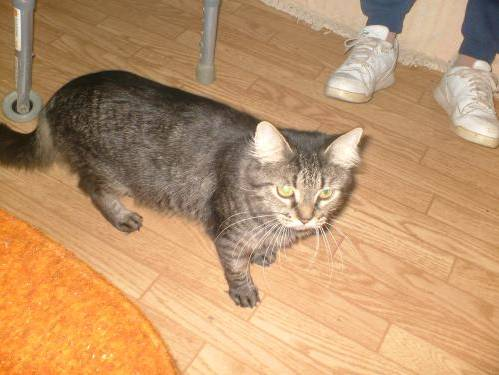

In [6]:
#viewing a random image
image = ds["image"][9]

label = ds["labels"][9]

image

Then, Load the `google/vit-base-patch16-224` model by using the HuggingFace class `TFViTForImageClassification`. After that, the images in the test dataset is predicted using the model. I have taken 100 images from the test set as the inference takes a long time as the number of images increases.

Then the classes predicted by the model as well as the actual classes in the dataset are printed.

In [7]:
import numpy as np

#loading the model
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = TFViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

inputValue = 0
predicted_ids = []
true_ids = []

while inputValue < 100:
  image = ds["image"][inputValue]
  true_ids.append(ds["labels"][inputValue])
  inputs = image_processor(images=image, return_tensors="tf")
  logits = model(**inputs).logits

  predicted_label = int(tf.math.argmax(logits, axis=-1))
  #return the class name
  predicted_class = model.config.id2label[predicted_label]
  if "cat" in predicted_class:
    predicted_ids.append(0)
  else:
    predicted_ids.append(1)
  inputValue = inputValue + 1

#predicted classes
print(predicted_ids)

#actual classes in dataset
print(true_ids)


All PyTorch model weights were used when initializing TFViTForImageClassification.

All the weights of TFViTForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.


[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]


Now, I am creating a Confusion matrix using the actual and predicted classes.

In [8]:
from sklearn.metrics import confusion_matrix

result = confusion_matrix(true_ids, predicted_ids)
print(result)

[[48  5]
 [ 0 47]]


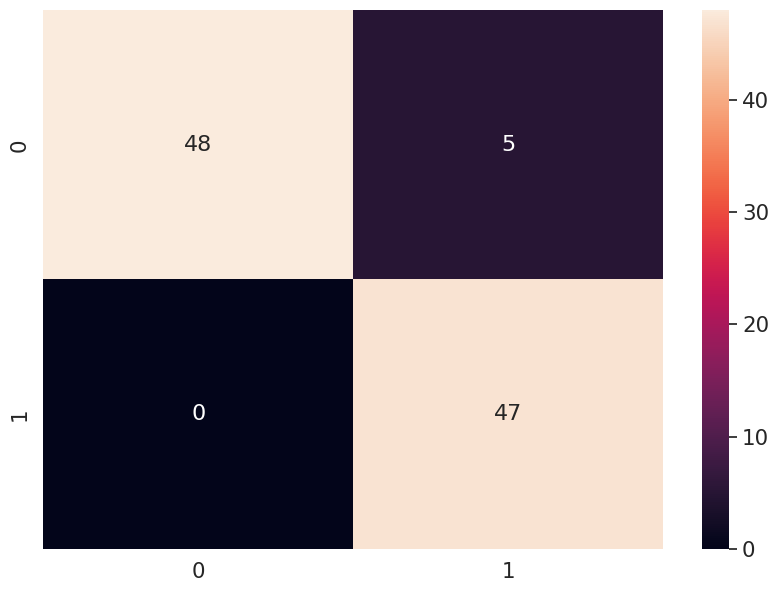

In [9]:
#For Graphical representation of the confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(result, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size

plt.show()

# Examples of Predicted output

To show few examples in the images dataset and its labels, I took first 5 images in the dataset.

The lable titles written in blue are correct predictions, whereas the lables in red are wrong predictions.

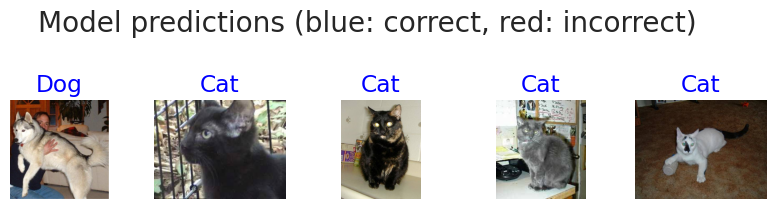

In [10]:
class_names = np.array(["cat", "dog"])
predicted_class_names = class_names[predicted_ids]
predicted_class_names

plt.figure(figsize=(10,9))
for n in range(5):
  plt.subplot(6,5,n+1)
  image_batch = ds["image"][n]
  label_batch = ds["labels"][n]
  plt.imshow(image_batch)
  color = "blue" if predicted_ids[n] == label_batch else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_= plt.suptitle("Model predictions (blue: correct, red: incorrect)")

#Observations:

On analysing the confusion matrix, It is found that we have

* 48 True positives (TP)
* 5 False Negatives (FN)
* 0 False Positives (FP)
* 47 True Negatives (TN)


Based on that, With 48 TP and 47 TP, the pretrained model `google/vit-base-patch16-224` performed well in correctly identifying both the classes in the `cats and dogs` dataset but incorrectly predicted the positive class for 5 False Negatives. Overall, the predictions of this pretrained model seems good.

